# YoloV8 overfitting

## First import dataset

In [1]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display
import cv2
import numpy as np
import os
import albumentations as A
import cv2
import os
import shutil
from tqdm import tqdm

from roboflow import Roboflow
rf = Roboflow(api_key="VxC7v9XReohDl7Wcmnnm")
%cd ../
project = rf.workspace("dlbs-zcxsj").project("strawberry-hxgaj")
dataset = project.version(1).download("yolov8")

Ultralytics YOLOv8.0.2 🚀 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24238MiB)
Setup complete ✅ (12 CPUs, 23.4 GB RAM, 93.4/95.6 GB disk)


/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to strawberry-1 in yolov8:: 100%|██████████| 5928/5928 [00:00<00:00, 10370.09it/s]


In [3]:
## UTILS

def transform_images(src_images_folder, dst_images_folder, src_labels_folder, dst_labels_folder, transforms):
    # Loop over all images
    for image_name in tqdm(os.listdir(src_images_folder)):
        # Load image
        image = cv2.imread(os.path.join(src_images_folder, image_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # albumentations uses RGB

        # Apply the augmentations
        transformed = transforms(image=image)
        transformed_image = transformed["image"]

        # Convert back to BGR for saving
        transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)

        # Save the augmented image
        cv2.imwrite(os.path.join(dst_images_folder, image_name), transformed_image)

        # Copy the labels
        shutil.copy(os.path.join(src_labels_folder, image_name.replace('.jpg', '.txt')),
                    os.path.join(dst_labels_folder, image_name.replace('.jpg', '.txt')))

## Train base

(No Augmentation, only small hyperparameter changes)

In [3]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=512, name="base")

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=base, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, n

In [4]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=512, pretrained = True, name = "pretrained_True", seed = 42)

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=pretrained_True, exist_ok=False, pretrained=True, optimizer=SGD, verbose=False, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, wor

In [5]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=512, name = "optimizer_AdamW", seed = 42)

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=optimizer_AdamW, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, wo

In [7]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=512, lr0 = 0.001, name = "llr_0.001", seed = 42)

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=llr_0.001, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspac

In [2]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=512, lr0 = 0.001, lrf = 0.001, warmup_bias_lr = 0.01, name = "llr_0.001_retrain", seed = 42)

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=llr_0.001_retrain, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, 

In [6]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=512, dropout = 0.3, name = "dropout_0.3", seed = 42)

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=dropout_0.3, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nm

In [3]:
!pip install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 29.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 38.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 70.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 56.1 MB/s eta 0:00:0000:0100:01m


## Train with full augmentation pipeline

In [40]:
# Define the augmentations
transforms = A.Compose([
    A.OneOf([
        A.RGBShift(always_apply=True),
        A.Rotate(limit=(-45, 45), always_apply=True),
        A.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0), always_apply=True),
    ], p=0.85),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
])

# Paths to the data
src_images_folder = f"{dataset.location}/train/images"
src_labels_folder = f"{dataset.location}/train/labels"

# Paths to the new folders
dst_images_folder = f"{dataset.location}/augmented_full_train/images"
dst_labels_folder = f"{dataset.location}/augmented_full_train/labels"

# Create the new folders if they don't exist
os.makedirs(dst_images_folder, exist_ok=True)
os.makedirs(dst_labels_folder, exist_ok=True)

# Loop over all images
for image_name in tqdm(os.listdir(src_images_folder)):
    # Load image
    image = cv2.imread(os.path.join(src_images_folder, image_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # albumentations uses RGB

    # Apply the augmentations
    transformed = transforms(image=image)
    transformed_image = transformed["image"]

    # Convert back to BGR for saving
    transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)

    # Save the augmented image
    cv2.imwrite(os.path.join(dst_images_folder, image_name), transformed_image)

    # Copy the labels
    shutil.copy(os.path.join(src_labels_folder, image_name.replace('.jpg', '.txt')),
                os.path.join(dst_labels_folder, image_name.replace('.jpg', '.txt')))
    
import yaml

# Load existing data.yaml
with open(f"{dataset.location}/data.yaml", 'r') as file:
    data = yaml.safe_load(file)

# Update the 'train' path
data['train'] = f"{dataset.location}/augmented_full_train/images"

# Save to the same yaml file
with open(f"{dataset.location}/data_augmented_full.yaml", 'w+') as file:
    yaml.dump(data, file)

100%|██████████| 1934/1934 [00:14<00:00, 132.84it/s]


In [30]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data_augmented_full.yaml", epochs=100, imgsz=512, name="base_augment_full")

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=base_augment_full, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, w

In [31]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data_augmented_full.yaml", epochs=100, imgsz=512, pretrained = True, name = "pretrained_True_augment_full", seed = 42)

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=pretrained_True_augment_full, exist_ok=False, pretrained=True, optimizer=SGD, verbose=False, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, 

In [32]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data_augmented_full.yaml", epochs=100, imgsz=512, name = "optimizer_AdamW_augment_full", seed = 42)

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=optimizer_AdamW_augment_full, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False,

In [33]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data_augmented_full.yaml", epochs=100, imgsz=512, lr0 = 0.001, name = "llr_0.001_augment_full", seed = 42)

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=llr_0.001_augment_full, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset

In [34]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data_augmented_full.yaml", epochs=100, imgsz=512, lr0 = 0.001, lrf = 0.001, warmup_bias_lr = 0.01, name = "llr_0.001_retrain_augment_full", seed = 42)

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=llr_0.001_retrain_augment_full, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=42, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fals

## Train only with sharpen as the augmentation

In [38]:
import albumentations as A
import cv2
import os
import shutil
from tqdm import tqdm

# Define the augmentations
transforms = A.Compose([
    A.OneOf([
        A.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0), always_apply=True),
    ], p=0.5)
])

# Paths to the data
src_images_folder = f"{dataset.location}/train/images"
src_labels_folder = f"{dataset.location}/train/labels"

# Paths to the new folders
dst_images_folder = f"{dataset.location}/only_sharpen_train/images"
dst_labels_folder = f"{dataset.location}/only_sharpen_train/labels"

# Create the new folders if they don't exist
os.makedirs(dst_images_folder, exist_ok=True)
os.makedirs(dst_labels_folder, exist_ok=True)

# Loop over all images
for image_name in tqdm(os.listdir(src_images_folder)):
    # Load image
    image = cv2.imread(os.path.join(src_images_folder, image_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # albumentations uses RGB

    # Apply the augmentations
    transformed = transforms(image=image)
    transformed_image = transformed["image"]

    # Convert back to BGR for saving
    transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)

    # Save the augmented image
    cv2.imwrite(os.path.join(dst_images_folder, image_name), transformed_image)

    # Copy the labels
    shutil.copy(os.path.join(src_labels_folder, image_name.replace('.jpg', '.txt')),
                os.path.join(dst_labels_folder, image_name.replace('.jpg', '.txt')))
    
import yaml

# Load existing data.yaml
with open(f"{dataset.location}/data.yaml", 'r') as file:
    data = yaml.safe_load(file)

# Update the 'train' path
data['train'] = f"{dataset.location}/only_sharpen_train/images"

# Save to the same yaml file
with open(f"{dataset.location}/only_sharpen_train.yaml", 'w') as file:
    yaml.dump(data, file)

100%|██████████| 1934/1934 [00:12<00:00, 152.31it/s]


In [39]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/only_sharpen_train.yaml", epochs=100, imgsz=512, name="base_only_sharpen")

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=base_only_sharpen, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, w

## Train with full augmentation and 5x the data

In [41]:
import albumentations as A
import cv2
import os
import shutil
from tqdm import tqdm
import yaml

# Number of copies to make for each image
num_copies = 5

transforms = A.Compose([
    A.OneOf([
        A.RGBShift(always_apply=True),
        A.Rotate(limit=(-45, 45), always_apply=True),
        A.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0), always_apply=True),
    ], p=0.85),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
])

# Paths to the data
src_images_folder = f"{dataset.location}/train/images"
src_labels_folder = f"{dataset.location}/train/labels"

# Paths to the new folders
dst_images_folder = f"{dataset.location}/augmented_full_5x_train/images"
dst_labels_folder = f"{dataset.location}/augmented_full_5x_train/labels"

# Create the new folders if they don't exist
os.makedirs(dst_images_folder, exist_ok=True)
os.makedirs(dst_labels_folder, exist_ok=True)

# Loop over all images
for image_name in tqdm(os.listdir(src_images_folder)):
    # Load image
    image = cv2.imread(os.path.join(src_images_folder, image_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # albumentations uses RGB

    # Generate multiple augmented copies of each image
    for i in range(num_copies):
        # Apply the augmentations
        transformed = transforms(image=image)
        transformed_image = transformed["image"]

        # Convert back to BGR for saving
        transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)

        # Generate a new name for the augmented image
        base_name, ext = os.path.splitext(image_name)
        new_image_name = f"{base_name}_{i+1}{ext}"

        # Save the augmented image
        cv2.imwrite(os.path.join(dst_images_folder, new_image_name), transformed_image)

        # Copy the labels
        shutil.copy(os.path.join(src_labels_folder, image_name.replace('.jpg', '.txt')),
                    os.path.join(dst_labels_folder, new_image_name.replace('.jpg', '.txt')))

# Load existing data.yaml
with open(f"{dataset.location}/data.yaml", 'r') as file:
    data = yaml.safe_load(file)

# Update the 'train' path
data['train'] = f"{dataset.location}/augmented_full_5x_train/images"

# Save to the same yaml file
with open(f"{dataset.location}/augmented_full_5x_train.yaml", 'w') as file:
    yaml.dump(data, file)

100%|██████████| 1934/1934 [00:57<00:00, 33.37it/s]


In [42]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/augmented_full_5x_train.yaml", epochs=100, imgsz=512, name="base_augmented_full_5x")

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/models/strawberry-1/augmented_full_5x_train.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=base_augmented_full_5x, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, sim

## Train only with rotation as augmentation

In [2]:
import albumentations as A
import cv2
import os
import shutil
from tqdm import tqdm

# Define the augmentations
transforms = A.Compose([
    A.OneOf([
        A.Rotate(limit=(-45, 45), always_apply=True),
    ], p=0.5)
])

# Paths to the data
src_images_folder = f"{dataset.location}/train/images"
src_labels_folder = f"{dataset.location}/train/labels"

# Paths to the new folders
dst_images_folder = f"{dataset.location}/only_rotate_train/images"
dst_labels_folder = f"{dataset.location}/only_rotate_train/labels"

# Create the new folders if they don't exist
os.makedirs(dst_images_folder, exist_ok=True)
os.makedirs(dst_labels_folder, exist_ok=True)

# Loop over all images
for image_name in tqdm(os.listdir(src_images_folder)):
    # Load image
    image = cv2.imread(os.path.join(src_images_folder, image_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # albumentations uses RGB

    # Apply the augmentations
    transformed = transforms(image=image)
    transformed_image = transformed["image"]

    # Convert back to BGR for saving
    transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)

    # Save the augmented image
    cv2.imwrite(os.path.join(dst_images_folder, image_name), transformed_image)

    # Copy the labels
    shutil.copy(os.path.join(src_labels_folder, image_name.replace('.jpg', '.txt')),
                os.path.join(dst_labels_folder, image_name.replace('.jpg', '.txt')))
    
import yaml

# Load existing data.yaml
with open(f"{dataset.location}/data.yaml", 'r') as file:
    data = yaml.safe_load(file)

# Update the 'train' path
data['train'] = f"{dataset.location}/only_rotate_train/images"

# Save to the same yaml file
with open(f"{dataset.location}/only_rotate_train.yaml", 'w') as file:
    yaml.dump(data, file)

100%|██████████| 1934/1934 [00:13<00:00, 143.77it/s]


In [3]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/only_rotate_train.yaml", epochs=100, imgsz=512, name="base_only_rotate")

100%|██████████| 22.8M/22.8M [00:00<00:00, 60.3MB/s]

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/strawberry-1/only_rotate_train.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=base_only_rotate, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=Fa

## Train only with flipping as augmentation

In [4]:
import albumentations as A
import cv2
import os
import shutil
from tqdm import tqdm

transforms = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
])

# Paths to the data
src_images_folder = f"{dataset.location}/train/images"
src_labels_folder = f"{dataset.location}/train/labels"

# Paths to the new folders
dst_images_folder = f"{dataset.location}/only_flip_train/images"
dst_labels_folder = f"{dataset.location}/only_flip_train/labels"

# Create the new folders if they don't exist
os.makedirs(dst_images_folder, exist_ok=True)
os.makedirs(dst_labels_folder, exist_ok=True)

# Loop over all images
for image_name in tqdm(os.listdir(src_images_folder)):
    # Load image
    image = cv2.imread(os.path.join(src_images_folder, image_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # albumentations uses RGB

    # Apply the augmentations
    transformed = transforms(image=image)
    transformed_image = transformed["image"]

    # Convert back to BGR for saving
    transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)

    # Save the augmented image
    cv2.imwrite(os.path.join(dst_images_folder, image_name), transformed_image)

    # Copy the labels
    shutil.copy(os.path.join(src_labels_folder, image_name.replace('.jpg', '.txt')),
                os.path.join(dst_labels_folder, image_name.replace('.jpg', '.txt')))
    
import yaml

# Load existing data.yaml
with open(f"{dataset.location}/data.yaml", 'r') as file:
    data = yaml.safe_load(file)

# Update the 'train' path
data['train'] = f"{dataset.location}/only_flip_train/images"

# Save to the same yaml file
with open(f"{dataset.location}/only_flip_train.yaml", 'w') as file:
    yaml.dump(data, file)

100%|██████████| 1934/1934 [00:12<00:00, 160.06it/s]


In [5]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/only_flip_train.yaml", epochs=100, imgsz=512, name="base_only_flip")

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/strawberry-1/only_flip_train.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=base_only_flip, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, 

## Train by normalizing every image

In [16]:
import albumentations as A
import cv2
import os
import shutil
from tqdm import tqdm

# Paths to the data
src_images_folder_train = f"{dataset.location}/train/images"
src_labels_folder_train = f"{dataset.location}/train/labels"
src_images_folder_valid = f"{dataset.location}/valid/images"
src_labels_folder_valid = f"{dataset.location}/valid/labels"
src_images_folder_test = f"{dataset.location}/test/images"
src_labels_folder_test = f"{dataset.location}/test/labels"

# Paths to the new folders
dst_images_folder_train = f"{dataset.location}/only_normalize_train/images"
dst_labels_folder_train = f"{dataset.location}/only_normalize_train/labels"
dst_images_folder_valid = f"{dataset.location}/only_normalize_valid/images"
dst_labels_folder_valid = f"{dataset.location}/only_normalize_valid/labels"
dst_images_folder_test = f"{dataset.location}/only_normalize_test/images"
dst_labels_folder_test = f"{dataset.location}/only_normalize_test/labels"

# Create the new folders if they don't exist
os.makedirs(dst_images_folder_train, exist_ok=True)
os.makedirs(dst_labels_folder_train, exist_ok=True)
os.makedirs(dst_images_folder_valid, exist_ok=True)
os.makedirs(dst_labels_folder_valid, exist_ok=True)
os.makedirs(dst_images_folder_test, exist_ok=True)
os.makedirs(dst_labels_folder_test, exist_ok=True)

def compute_mean_std(image_folder):
    num_pixels = 0
    sum_pixels = np.zeros(3)
    sumsq_pixels = np.zeros(3)

    for image_name in tqdm(os.listdir(image_folder)):
        img = cv2.imread(os.path.join(image_folder, image_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0

        # Sum of pixel values
        sum_pixels += img.sum(axis=(0, 1))
        # Sum of squared pixel values
        sumsq_pixels += np.sum(np.square(img), axis=(0, 1))

        num_pixels += img.shape[0] * img.shape[1]

    # Compute mean and standard deviation
    mean_vals = sum_pixels / num_pixels
    std_vals = np.sqrt(sumsq_pixels / num_pixels - np.square(mean_vals))

    return mean_vals, std_vals

# Compute mean and std
mean, std = compute_mean_std(src_images_folder_train)

print('Mean: ', mean)
print('Standard Deviation: ', std)

transforms = A.Compose([
    A.Normalize(mean=tuple(mean), std=tuple(std), max_pixel_value=1.0),  # Normalization
])

transform_images(src_images_folder_train, dst_images_folder_train, src_labels_folder_train, dst_labels_folder_train, transforms)
transform_images(src_images_folder_valid, dst_images_folder_valid, src_labels_folder_valid, dst_labels_folder_valid, transforms)
transform_images(src_images_folder_test, dst_images_folder_test, src_labels_folder_test, dst_labels_folder_test, transforms)

# Load existing data.yaml
with open(f"{dataset.location}/data.yaml", 'r') as file:
    data = yaml.safe_load(file)

# Update the 'train' path
data['train'] = f"{dataset.location}/only_normalize_train/images"
data['valid'] = f"{dataset.location}/only_normalize_valid/images"
data['test'] = f"{dataset.location}/only_normalize_test/images"

# Save to the same yaml file
with open(f"{dataset.location}/only_normalize_train.yaml", 'w') as file:
    yaml.dump(data, file)

100%|██████████| 1934/1934 [00:21<00:00, 89.14it/s]


Mean:  [    0.42335     0.48819     0.26154]
Standard Deviation:  [    0.20666     0.19278      0.2113]


100%|██████████| 716/716 [00:05<00:00, 139.64it/s]


In [18]:
# Load a model
model = YOLO('yolov8s-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/only_normalize_train.yaml", epochs=100, imgsz=512, name="base_only_normalize")

yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/strawberry-1/only_normalize_train.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=base_only_normalize, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, 

## Check image after normalization

  5%|▌         | 99/1934 [00:00<00:04, 402.97it/s]


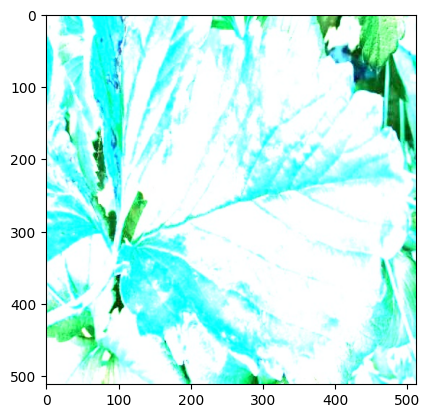

[    0.42335     0.48819     0.26154] [    0.20666     0.19278      0.2113]


In [17]:
def check_mean_std(image_folder):
    mean_vals = []
    std_vals = []

    for image_name in tqdm(os.listdir(image_folder)):
        img = cv2.imread(os.path.join(image_folder, image_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0

        mean_vals.append(np.mean(img, axis=(0, 1)))
        std_vals.append(np.std(img, axis=(0, 1)))

    mean_vals = np.array(mean_vals)
    std_vals = np.array(std_vals)

    print("Mean: ", np.mean(mean_vals, axis=0))
    print("Standard Deviation: ", np.mean(std_vals, axis=0))

check_mean_std(dst_images_folder)


In [19]:
# Load a model
model = YOLO('yolov8x-seg.pt')

# Train the model
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=512, name="base_xl_model")

100%|██████████| 137M/137M [00:02<00:00, 54.3MB/s] 

yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.yaml, data=/media/bruno/0d2f61d2-2b9c-4043-9a46-8e4dfe74fc95/bruno/Documents/dlbs_fs23/strawberry-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=512, save=True, cache=False, device=None, workers=8, project=None, name=base_xl_model, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, 